# Week 11 (03/29 -- 04/02) Contents
 - Decision Tree Regression
 
## We are going to apply the tree-based regressor from scikit-learn to real data 

Model reference page: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Real world data
 - Advertising.csv
 - Hitters.csv
 
#### Things to do
 - Load the data
 - Declare the model (specifying model parameters)
 - Draw Tree Diagram
 - Evaluate the performance

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_advertising = pd.read_csv('Advertising.csv')
df_advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
X = df_advertising['TV'].values.reshape(-1,1)
y = df_advertising['Sales'].values.reshape(-1,1)


### Declare the model
### The following parameter determines how tall the tree model is 
 - max_leaf_nodes 

In [4]:
regr_tree = DecisionTreeRegressor(max_leaf_nodes=2)
regr_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=2)

### To see the performance of the new model, we can plot the prediction like we did before in linear regression

In [5]:
X_test = np.arange(0.0, 300.0, 1.5).reshape(-1,1)
y_pred = regr_tree.predict(X_test)

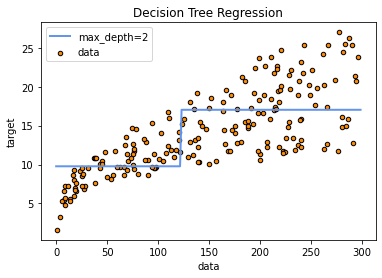

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Obviously, the decision tree does not capture the quantitative relation between y (sales) and x (TV). 
### But, the tree model has better interpretability because we can draw the tree diagram

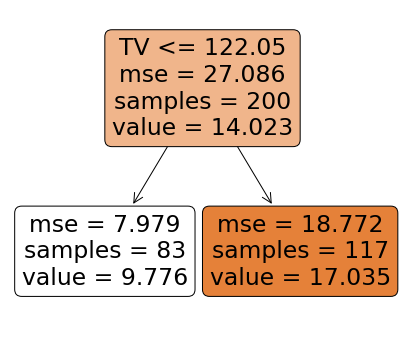

In [7]:
#from sklearn.tree import plot_tree
from sklearn.tree._export import plot_tree

fig, ax = plt.subplots(figsize=(7, 6))
plot_tree(regr_tree, feature_names = ['TV'], rounded = True, filled=True)
plt.show()

### The message from above tree diagram is simple: if 'tv' value < 122.05, sales can only be 9.776. Otherwise, sales can only be 17.035
### We may try to verify the conclusion

In [8]:
x_test_1 = [[40]]
regr_tree.predict(x_test_1)

array([9.77590361])

In [9]:
x_test_2 = [[123]]
regr_tree.predict(x_test_2)

array([17.03504274])

### Exercise. Convince yourself by trying with another value of x_test and see what the predicted y is.

## Now we start over the procedure by splitting the data into training and test parts. We want to see the test error and compare with our old model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(160, 1)
(40, 1)


In [11]:
regr_tree1 = DecisionTreeRegressor(max_leaf_nodes=2)
regr_tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=2)

In [12]:
y_pred_train = regr_tree1.predict(X_train)
print('Training error is {}'.format(np.std(y_pred_train-y_train)))

Training error is 6.241596602390778


In [13]:
y_pred_test = regr_tree1.predict(X_test)
print('Test error is {}'.format(np.std(y_pred_test-y_test)))

Test error is 6.440191859706634


### Exercise. Use the same data here, and fit the training data with linear regression model. Compare the training and test errors with the results from decision tree regressor.

## We shall see the advantage of using tree regressor by applying to different data.
### Import the baseball salary data which contain the years, number of hits, etc, of MLB players.

In [15]:
df_hitters = pd.read_csv('Hitters.csv').dropna()
df_hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


### Our goal is to understand the relation between salary and palyer's attribute (such as years, hits, rbi)
### As a simpler example, we decide to take the 'Years' and 'Hits' columns as our input (X), and the 'Salary' column as output (y)

### Remark: we usually like to study the response data which has a normal distribution. As we see below, we can use the trick of converting data y into log(y) so that the latter is closer to a normal distribution 

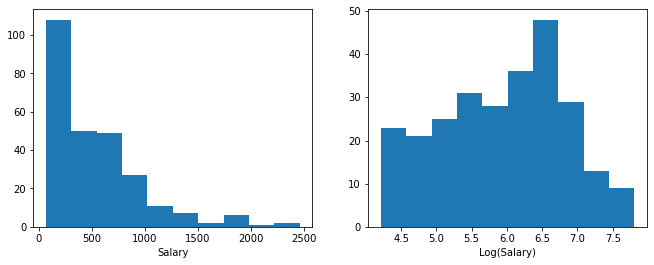

In [16]:
X = df_hitters[['Years', 'Hits']].values
y = np.log(df_hitters.Salary.values)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df_hitters.Salary.values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

### Now with both input (X) and output (y) data, we can train the tree regression model

In [17]:
regr_hitters = DecisionTreeRegressor(max_leaf_nodes=3)
regr_hitters.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

## The best thing about the tree regressor is we can easily understand the prediction by drawing the tree diagram

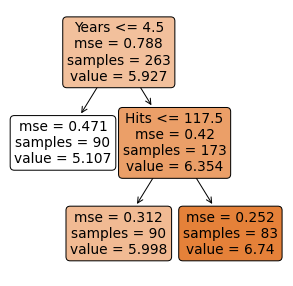

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_tree(regr_hitters, feature_names = ['Years', 'Hits'], rounded = True, filled=True)
plt.show()

## To really understand the predicting tree diagram, let's apply it to the following player
 - Years: 5
 - Hits: 54

In [20]:
regr_hitters.predict([[5,54]])

array([5.99837985])

### Explaination of above result: Looking from the top node, and the year value > 4.5 leads to the right node in the second layer. Because number of hits < 117.5, so one go down to the left node, in which the predicted salary in log scale is 5.998. So his salary is:

In [22]:
np.exp(regr_hitters.predict([[5,54]]))

array([402.77570648])

In [23]:
df_hitters.iloc[102]

Unnamed: 0    -Harold Reynolds
AtBat                      445
Hits                        99
HmRun                        1
Runs                        46
RBI                         24
Walks                       29
Years                        4
CAtBat                     618
CHits                      129
CHmRun                       1
CRuns                       72
CRBI                        31
CWalks                      48
League                       A
Division                     W
PutOuts                    278
Assists                    415
Errors                      16
Salary                    87.5
NewLeague                    A
Name: 133, dtype: object

## Quiz 1. Use the above data for Harold Reynolds, what is the predicted salary for him? The following components shall help you. 
 - Which terminal node shall this player's data go to?
 - What is the predicted value of log(salary)
 - What is the salary?

In [24]:
np.exp(regr_hitters.predict([[4,99]]))

array([165.1393406])

## The power of decision tree can be seen when applying to data with high dimensional input X. 
## In the following, we expand X by including more columns

In [25]:
X = df_hitters[['Years', 'Hits', 'PutOuts', 'Runs', 'Walks', 'RBI']].values

In [26]:
regr_hitters = DecisionTreeRegressor(max_leaf_nodes=16)
regr_hitters.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=16)

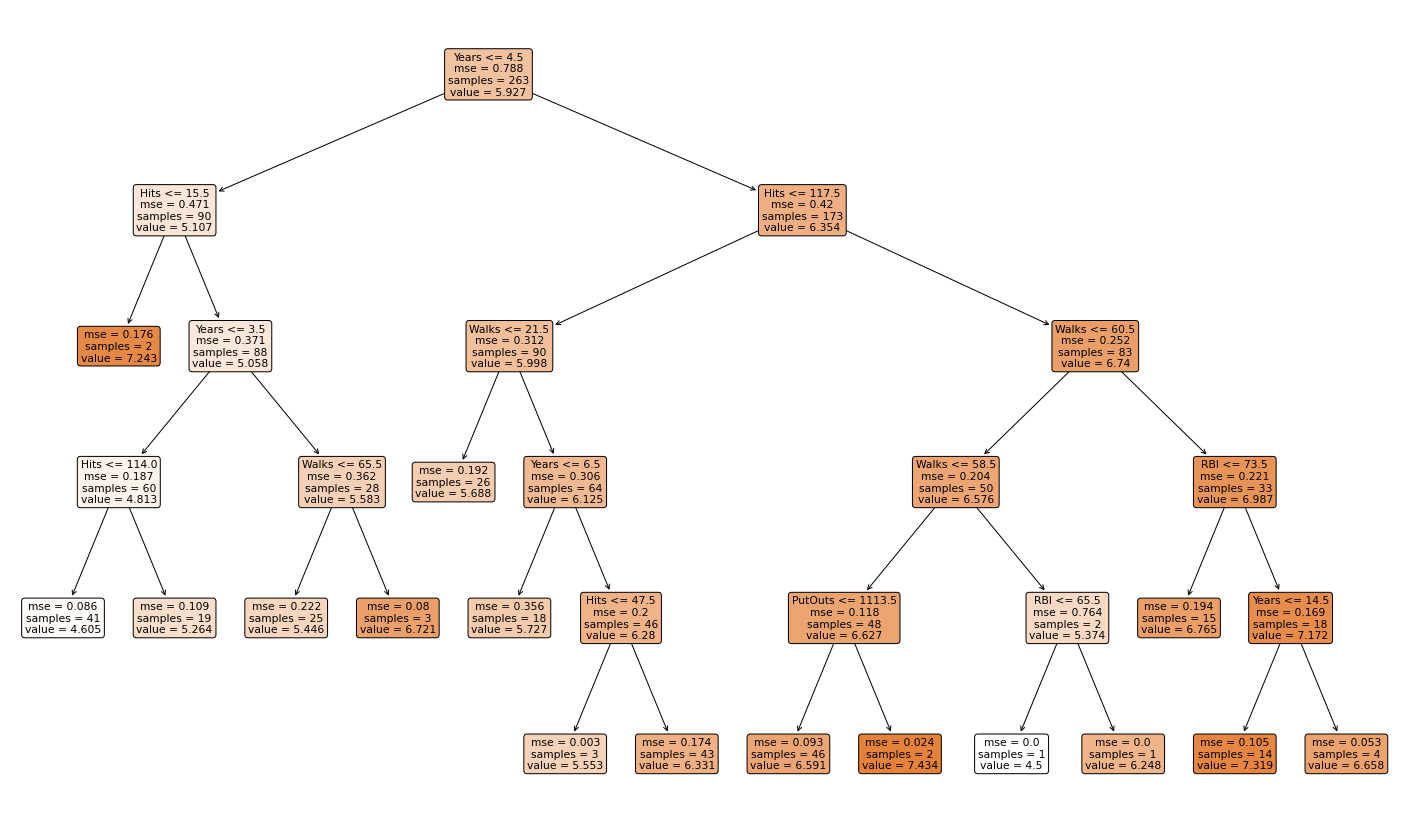

In [27]:
fig, ax = plt.subplots(figsize=(25, 15))
plot_tree(regr_hitters, feature_names = ['Years', 'Hits', 'PutOuts', 'Runs', 'Walks', 'RBI'], rounded = True, filled=True)
plt.show()

### Quiz 2. Use the trained model we just obtained, what is the predicted salary for the player 'Howard Johnson'?

In [28]:
df_Johnson = pd.DataFrame(df_hitters.iloc[100]).T
df_Johnson

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
131,-Howard Johnson,220,54,10,30,39,31,5,1185,299,...,145,154,128,N,E,50,136,20,297.5,N


In [30]:
Johnson_X = df_Johnson[['Years', 'Hits', 'PutOuts', 'Runs', 'Walks', 'RBI']].values

In [31]:
regr_hitters.predict(Johnson_X)

array([5.72712843])

In [35]:
np.exp(regr_hitters.predict(Johnson_X))

array([307.08618165])

In [33]:
Johnson_y = df_Johnson.Salary.values

In [34]:
print(Johnson_y)

[297.5]
